In [60]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [61]:
!kaggle datasets download -d tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [62]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [63]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [64]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 1 classes.
Found 2023 files belonging to 1 classes.


In [65]:
#normalise
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [66]:
#create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 [==============================] - 31s 108ms/step - loss: 0.0156 - accuracy: 0.9990 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
251/251 [==============================] - 27s 105ms/step - loss: 1.7417e-29 - accuracy: 1.0000 - val_loss: 2.4177e-17 - val_accuracy: 1.0000
Epoch 3/10
251/251 [==============================] - 28s 112ms/step - loss: 8.1983e-12 - accuracy: 1.0000 - val_loss: 4.0263e-25 - val_accuracy: 1.0000
Epoch 4/10
251/251 [==============================] - 27s 105ms/step - loss: 8.8620e-20 - accuracy: 1.0000 - val_loss: 2.4289e-33 - val_accuracy: 1.0000
Epoch 5/10
251/251 [==============================] - 28s 108ms/step - loss: 8.2295e-19 - accuracy: 1.0000 - val_loss: 1.0759e-33 - val_accuracy: 1.0000
Epoch 6/10
251/251 [==============================] - 27s 106ms/step - loss: 4.9003e-14 - accuracy: 1.0000 - val_loss: 1.6193e-33 - val_accuracy: 1.0000
Epoch 7/10
251/251 [==============================] - 29s 113ms/step - loss: 2.2219e-2

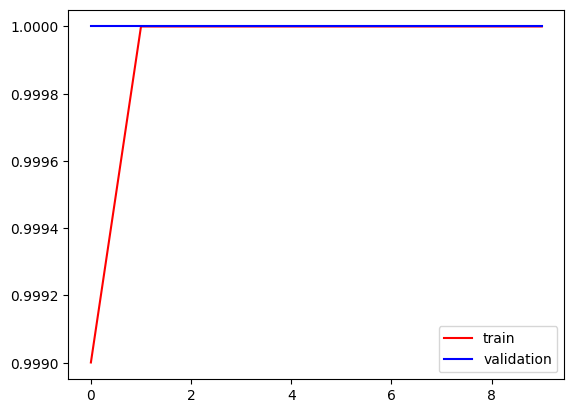

In [70]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

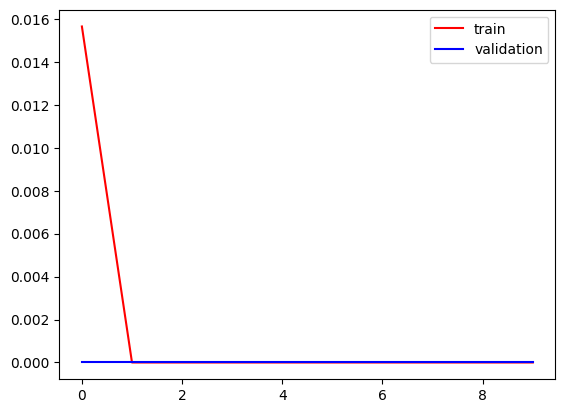

In [71]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

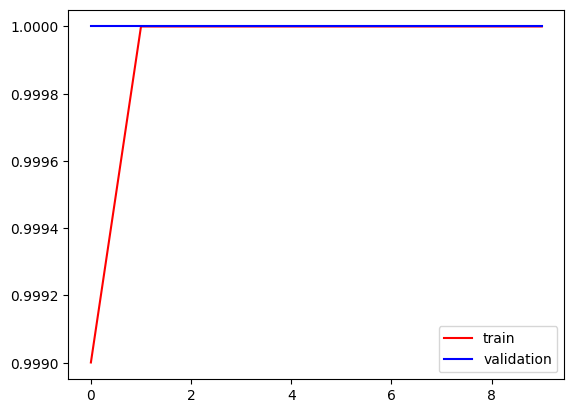

In [72]:
#After
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

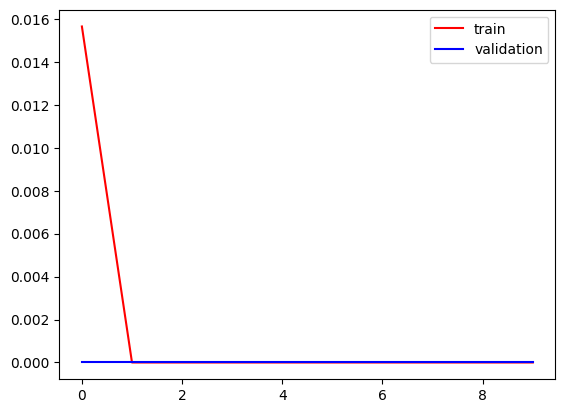

In [73]:
#After
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [74]:
import cv2

In [75]:
test_img=cv2.imread('/content/dog.jpeg')

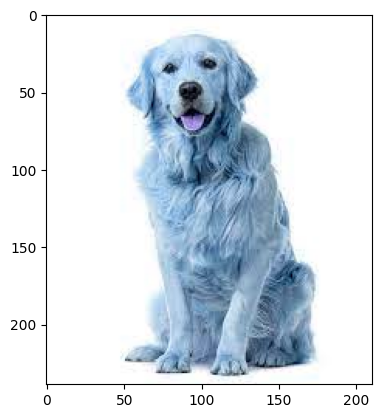

In [76]:
plt.imshow(test_img)

In [77]:
test_img.shape

(239, 211, 3)

In [79]:
test_img=cv2.resize(test_img,(256,256))

In [80]:
test_input=test_img.reshape((1,256,256,3))

In [81]:
model.predict(test_input)

1/1 [==============================] - 0s 106ms/step


array([[0.]], dtype=float32)

In [82]:
test_img=cv2.imread('/content/cat.jpeg')

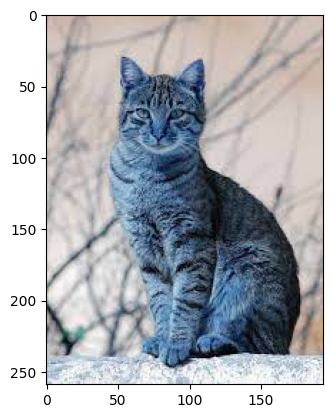

In [83]:
plt.imshow(test_img)

In [84]:
test_img.shape

(259, 194, 3)

In [85]:
test_img=cv2.resize(test_img,(256,256))

In [86]:
test_input=test_img.reshape((1,256,256,3))

In [87]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[0.]], dtype=float32)